# Analysis of Stock Data

In [427]:
from pathlib import Path
import datetime
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

Stocks used: Amazon, Netflix, Delta Air Lines, Ford

Declaring important data:

In [428]:
# prefix for fetching the data
html_prefix = "http://mlg.ucd.ie/modules/COMP30760/stocks/data-"

# stocks for study
stock_names = ["Amazon", "Netflix", "Delta Air Lines", "Ford"]

# codes which the stock market uses to label these companies
stock_ids = {"Amazon":"AMZN", "Netflix":"NFLX", "Delta Air Lines":"DAL", "Ford":"F"}

# colours used in the comparison graphs
stock_colours = {"Amazon":"orange", "Netflix":"red", "Delta Air Lines":"purple", "Ford":"blue"}

# directory for storing clean pre-processed data
dir_data = Path("data")
# make sure it exists
dir_data.mkdir(parents=True, exist_ok=True)

# Data Analysis

## Data Loading

Reloading the time series data stored in the last task

In [429]:
ts_stocks = {}
for stock_name in stock_names:
    fname = "%s.json" % stock_ids[stock_name]
    in_path = dir_data / fname
    ts_stocks[stock_name] = pd.read_json(in_path, orient="index")
    
    print("%s: %d rows of data" % 
          (stock_name, len(ts_stocks[stock_name])))
    
# putting the data from each time series into a data frame
df_stocks = pd.concat([ts_stocks[stock_names[0]],ts_stocks[stock_names[1]],ts_stocks[stock_names[2]],ts_stocks[stock_names[3]]], axis=1)
df_stocks.columns = [stock_names[0], stock_names[1], stock_names[2], stock_names[3]]

Amazon: 505 rows of data
Netflix: 505 rows of data
Delta Air Lines: 505 rows of data
Ford: 505 rows of data


Checking formatting of data read in

In [430]:
df_stocks.head(5)

,Amazon,Netflix,Delta Air Lines,Ford
2019-10-01,1735.650024,269.579987,57.009998,8.90
2019-10-02,1713.229980,268.029999,54.349998,8.61
2019-10-03,1724.420044,268.149994,52.830002,8.71
2019-10-04,1739.650024,272.790009,53.810001,8.74
2019-10-07,1732.660034,274.459991,53.360001,8.68


Check for null values

In [431]:
for stock_name in stock_names:
    print(df_stocks.isnull().sum())

Amazon             0
Netflix            0
Delta Air Lines    0
Ford               0
dtype: int64
Amazon             0
Netflix            0
Delta Air Lines    0
Ford               0
dtype: int64
Amazon             0
Netflix            0
Delta Air Lines    0
Ford               0
dtype: int64
Amazon             0
Netflix            0
Delta Air Lines    0
Ford               0
dtype: int64


# Characterisation and Visualisation of Data at Different frequencies

Calculating what the rolling count should be for a monthly and quarterly rolling mean

Define two extra dataframes to get monthly and quarterly averages

In [432]:
df_monthly = df_stocks.resample("M").mean()
df_quarterly = df_stocks.resample("Q").mean()

Defining functions to create line graphs for a stock

In [433]:
def frequency_plot(stock_name):
    fig, ax1 = plt.subplots()
    x1 = df_stocks.index
    y1 = df_stocks[stock_name]
    # approximate monthly rolling average
    x2 = df_monthly.index
    y2 = df_monthly[stock_name]
    
    # approximate rolling quarterly average
    x3 = df_quarterly.index
    y3 = df_quarterly[stock_name]
    
    # Daily figures
    ax1.plot(x1, y1, color = "grey")
    
    # Monthly averages
    ax1.plot(x2, y2, color = "green")
    
    # Quarterly averages
    ax1.plot(x3, y3, color = "red")
    
    ax1.set_ylabel("Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_title("Stock Price and Averages Over Time for %s" % stock_name)
    

    ax1.set_ylim(0, df_stocks[stock_name].max()*1.2)
    ax1.set_xlim(firstdate, lastdate)
    
    ax1.legend(["Daily Stock Price", "Monthly Average", "Quarterly Average"])
    
    fig.tight_layout()
    fig.set_size_inches(15, 10)

Finding the most accurate day count per month and quarter for the stocks to allow rolling means to be calculated

In [434]:
firstdate = df_stocks.first_valid_index()
lastdate = df_stocks.last_valid_index()

monthlyroll = int(df_stocks["Amazon"].size/(((lastdate.year - firstdate.year) * 12) + lastdate.month+1 - firstdate.month))
print(monthlyroll)
# average of 21 days per month in the dataset

quarterlyroll = monthlyroll*3
print(quarterlyroll)
#average of 63 days in a quarter

21
63


In [435]:
def frequency_plot_rolling(stock_name):
    fig, ax1 = plt.subplots()
    x = df_stocks.index
    y1 = df_stocks[stock_name]
    # approximate monthly rolling average
    y2 = df_stocks[stock_name].rolling(monthlyroll).mean()
    # approximate rolling quarterly average
    y3 = df_stocks[stock_name].rolling(quarterlyroll).mean()
    
    # Daily figures
    ax1.plot(x, y1, color = "grey")
    
    # Monthly rolling average
    ax1.plot(x, y2, color = "green")
    
    # Quarterly rolling average
    ax1.plot(x, y3, color = "red")
    
    ax1.set_ylabel("Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_title("Stock Price and Moving Averages Over Time for %s" % stock_name)
    

    ax1.set_ylim(0, df_stocks[stock_name].max()*1.2)
    ax1.set_xlim(firstdate, lastdate)
    
    ax1.legend(["Daily Stock Price", "Monthly Rolling Average", "Quarterly Rolling Average"])
    
    fig.tight_layout()
    fig.set_size_inches(15, 10)

Finding the percentage change in price throughout the period for the four stocks

In [436]:
percent_change = {}

for stock_name in stock_names:
    percent_change[stock_name] = (df_stocks[stock_name].iloc[-1]/df_stocks[stock_name].iloc[0])*100-100

## Amazon(AMZN) Stock

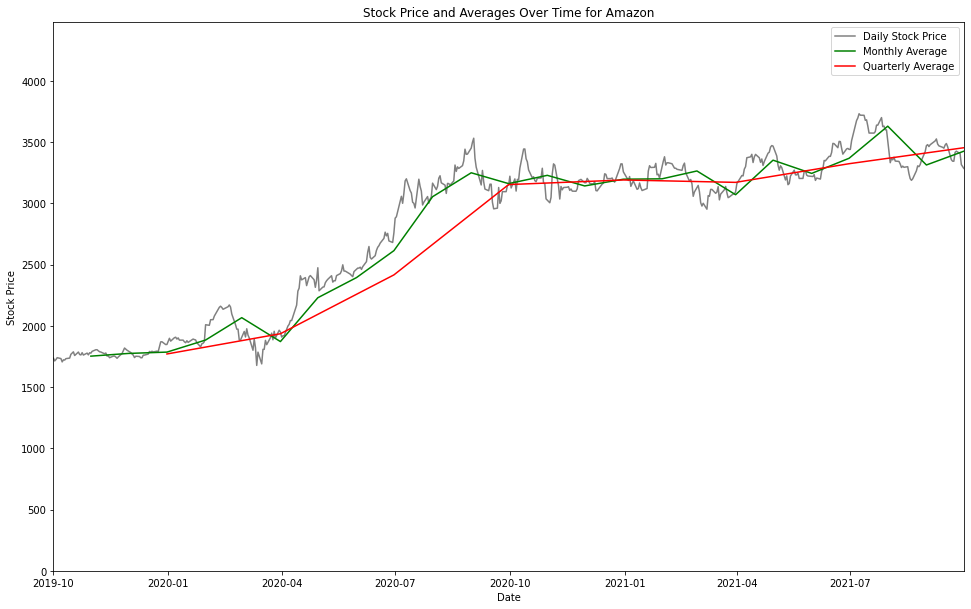

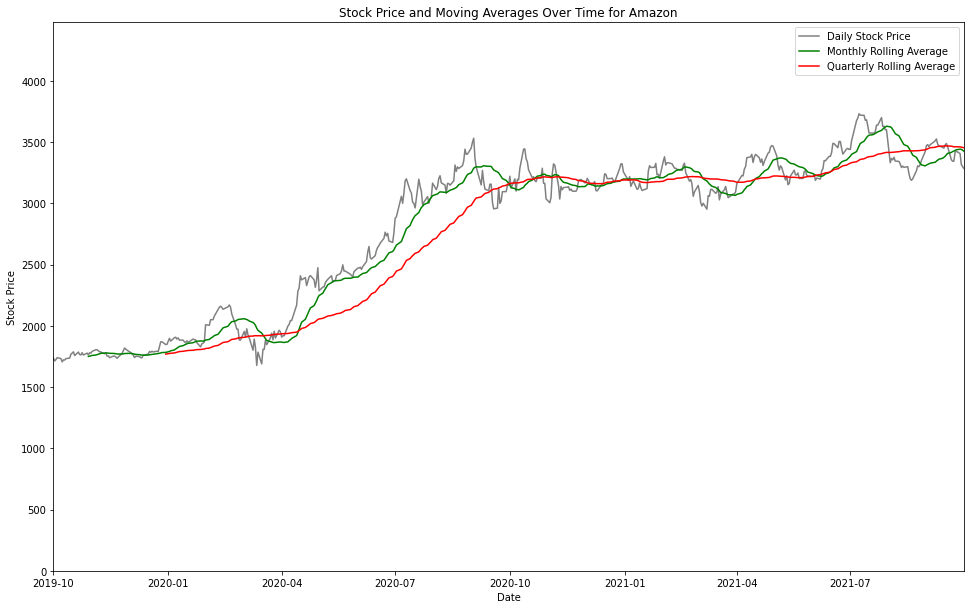

In [437]:
frequency_plot(stock_names[0])
frequency_plot_rolling(stock_names[0])

In [438]:
percent_change[stock_names[0]]

89.26857336303647

Amazon stock price is generally quite steady. It dipped slightly in March 2020 before seeing a very sharp increase soon after the start of the pandemic. It is still going up even though a lot of the effects of the pandemic that were driving it up have lessened. The main drive of Amazon's rapid increase in the pandemic was when the majority of retailers had to close down for lockdown, but even as the in person retailers have reopened, Amazon's stock is still very high, seeing a near doubling in price over the period

## Netflix(NFLX) Stock

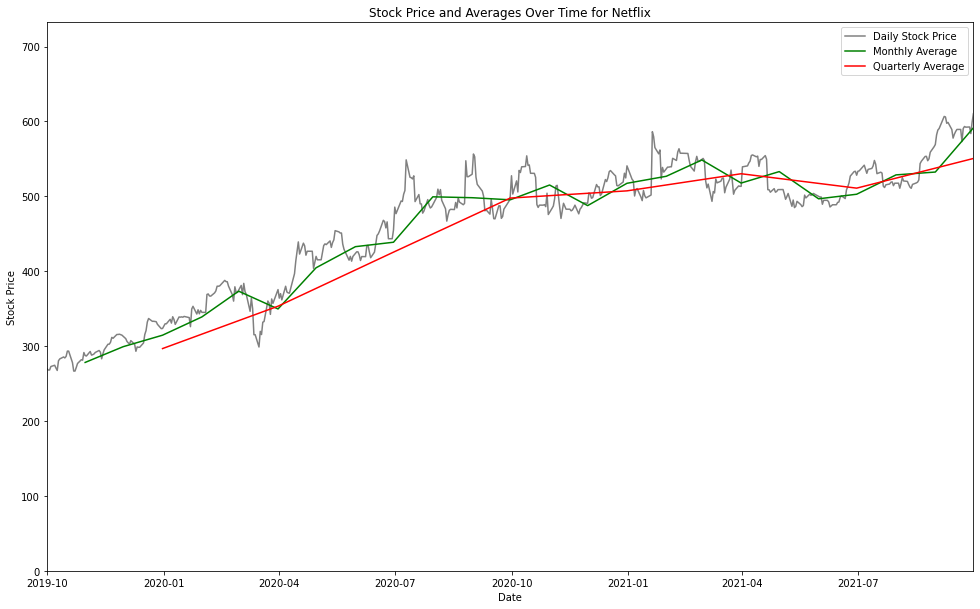

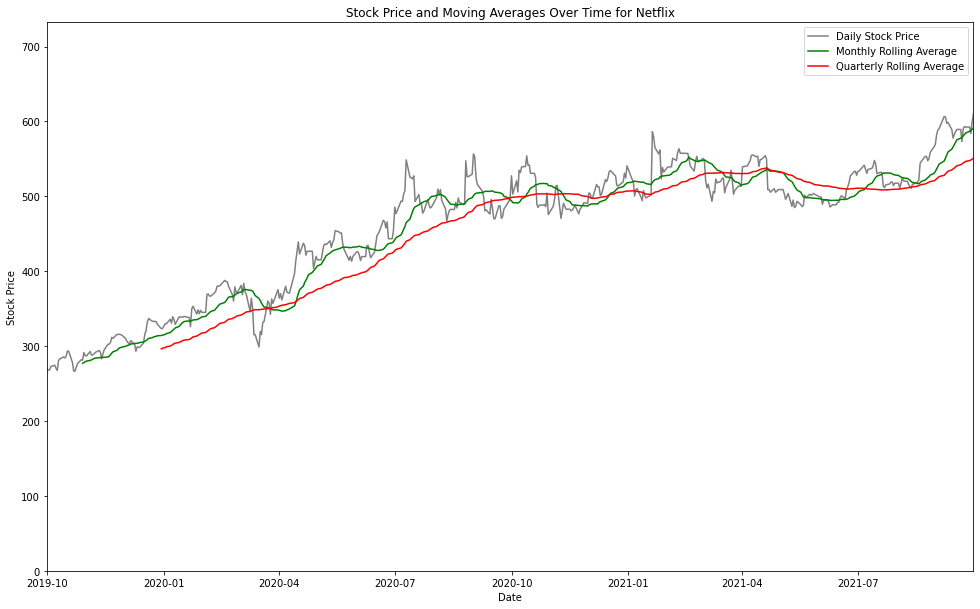

In [439]:
frequency_plot(stock_names[1])
frequency_plot_rolling(stock_names[1])

In [440]:
percent_change[stock_names[1]]

126.40405684120756

For this entire period Netflix has seen a steady rise in stock price, other than a tiny dip also in March 2020. The period after this dip was coincided with its strongest period of growth from April to October 2020. Since then it has plateaud a bit but is mostly steady. Around April of 2021 it saw a bit of a drop in value but towards the very end near September it started to grow rapidly again, finishing with more than double the market value it had at the start of the period

## Delta Air Lines(DAL) Stock

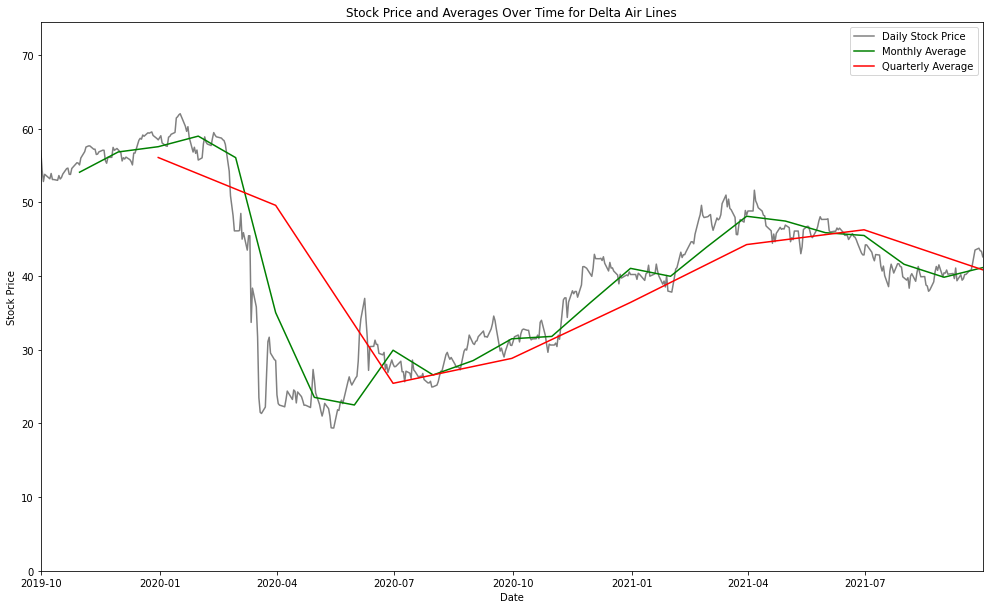

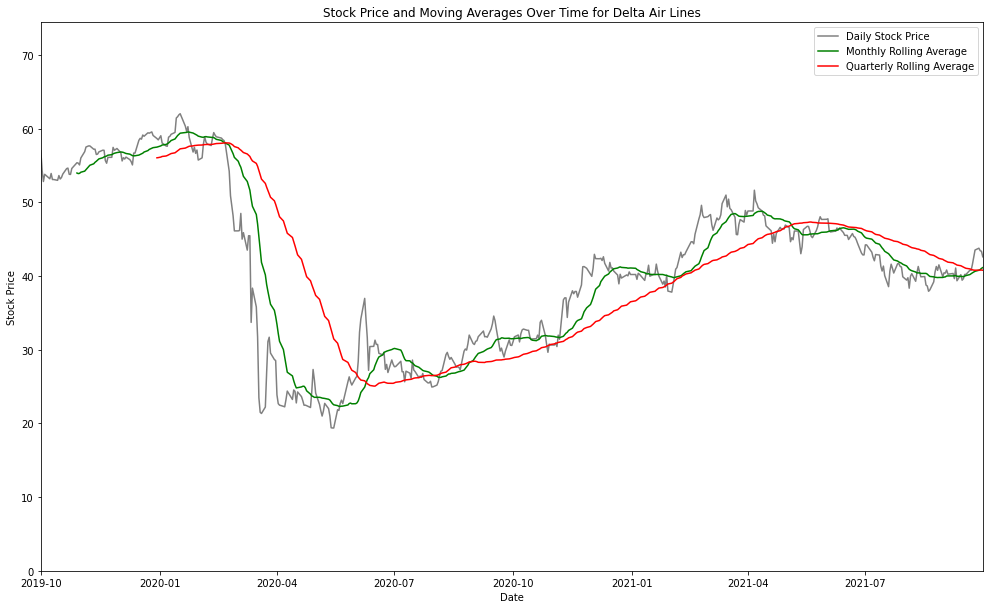

In [441]:
frequency_plot(stock_names[2])
frequency_plot_rolling(stock_names[2])

In [442]:
percent_change[stock_names[2]]

-25.258722163084457

Delta stock price was rising steadily in the first few months of the period but, like most air lines, took a massive hit as the majority of air travel was cancelled for the pandemic. Since then it has been fluctuating quite a bit, but with its quarterly rolling average steadily climbing up until this Summer when it saw another decline, this one much less severe than the first. Delta finished the period having lost 25% of its market value since the start of the period but considering the initial hit of the pandemic, a near 70% plummet in value

## Ford(F) Stock

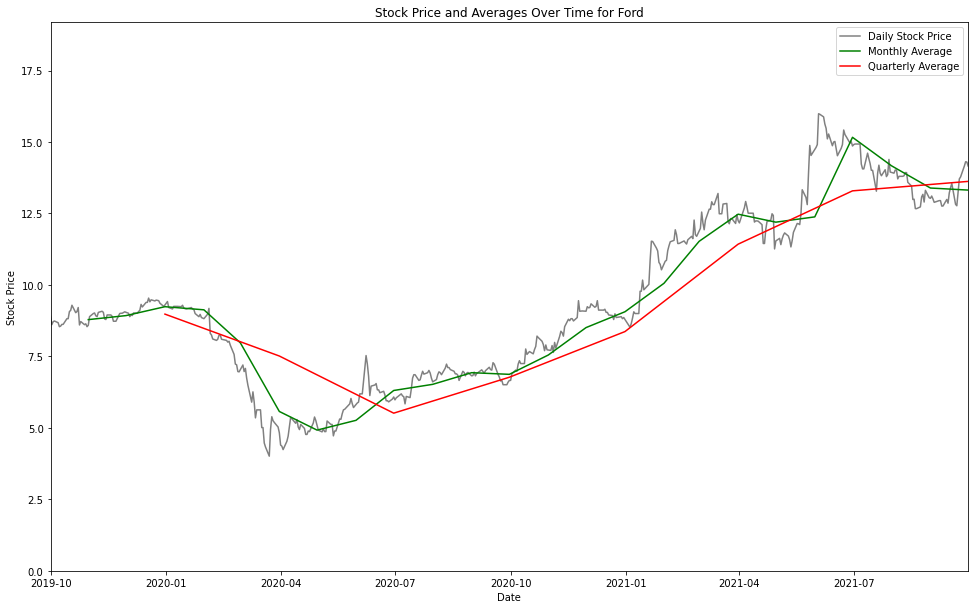

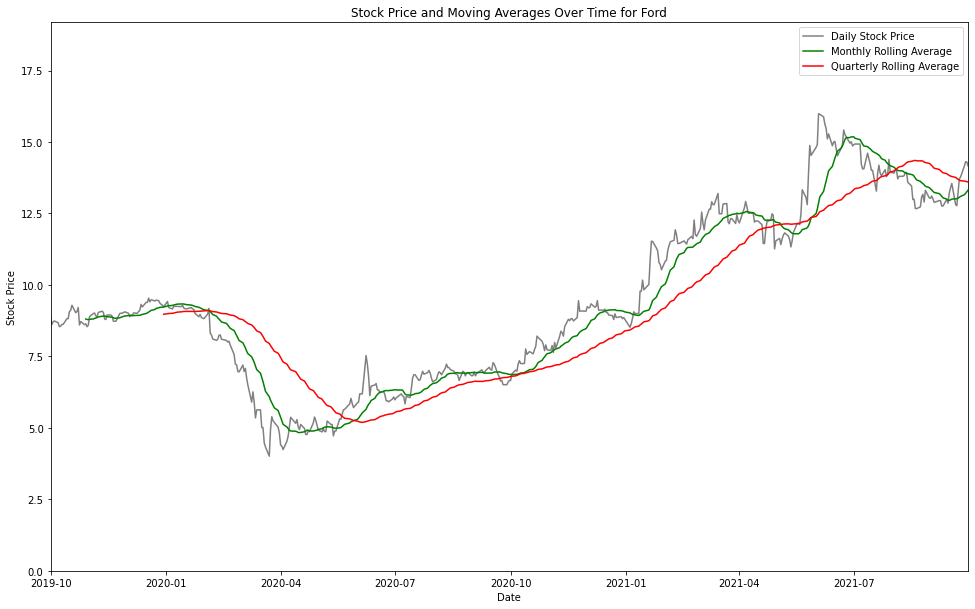

In [443]:
frequency_plot(stock_names[3])
frequency_plot_rolling(stock_names[3])

In [444]:
percent_change[stock_names[3]]

59.10112359550561

Ford saw a sharp drop at the start of the pandemic and then began increasing soon after. Recently it has been quite sporadic, seeing a sharp spike in July 2021 before going back down quickly. It since the start of the pandemic the Ford stock price has risen about 60% higher than its pre-pandemic price. Showing that Ford overall has not had too bad a time in the pandemic

# Comparison of Data

The pandemic, especially at the beginning effected every companies stock price in different ways, and to varying degrees. We saw that the two tech companies Amazon and Netflix saw increases throughout the whole pandemic with Amazon getting a very quick push in price at the beginning as people relied more heavily on these tech companies for entertainment and shopping during lockdowb. This is in stark contrast to Ford and Delta who saw a sudden downturn in stock price as sson as the pandemic hit, drastically reducing their business

In order to study the correlation between the stock prices more closely we will define a function to compute the pairwise Pearson correlations between the countries and displays this as a 'heatmap' visualisation

In [445]:
def plot_heatmap(title, df_in, figsize=(5.5, 5)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df_corr, square=True, cbar=False,
                annot=True, cmap=cmap, linewidths=0.5, vmin=-1)
    ax.set_title(title)

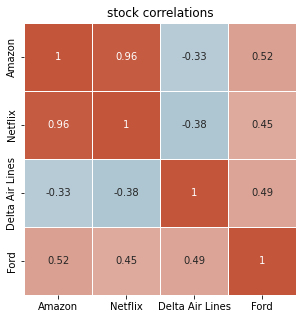

In [446]:
plot_heatmap("stock correlations", df_stocks)

We can see here that Netflix and Amazon have a very high correlation which makes sense as, as discussed they are both tech companies which saw a lot more business thanks to the pandemic.

Delta Air Lines has a weak negative correlation with both of these companies, the only negative correlations out of the four companies. This makes sense as Delta Air Lines was the only company to close this period at a lower price than it started at which contrasts heavily with Amazon and Netflix's approxiamtely 100% increase in stock price over the period. The reason it is a weak is because after the initial hit, all of the companies began to rise steadily fromt the period of July 2020 to July 2021.

Ford has a reasonably weak correlation with all of the companies. This is because Ford had a slightly less severe initial dip than Delta Air Lines allowing it to still finish with an increase in stock price over the period, correlating it with the two tech companies. However Ford did see a substantial dip in March 2020 losing nearly half of it's market value, also correlating it with Delta Air Lines

## Comparison with line graph using normalised data

It will be easier to make sense of these correlations by comparing the trends on a normalised graph of the different stocks. To show the trends accurately we have to normalise the prices as otherwise the trends will be very hard to see with the high variance in stock price between the stocks.

Normalising the data based on the opening value of each stock to clearly show the trend between the prices over time

In [447]:
df_stocks_norm = {}
for stock_name in stock_names:
    min = df_stocks[stock_name].min()
    max = df_stocks[stock_name].max()
    x = df_stocks[stock_name]

    # time series normalization part
    # y will be a column in a dataframe
    df_stocks_norm[stock_name] = (x) / (x.iloc[0])

Finding max value of the normalised data to find the limit of the graph

In [448]:
maxes = []

# collecting all the max values for each 
for stock_name in stock_names:
    maxes.append(df_stocks_norm[stock_name].max())
    
npmaxes = np.array(maxes)
norm_max = npmaxes.max()

Define a function to create a plot of daily, rolling monthly and rolling quarterly comparisons for each of the normalised data

In [449]:
def comparing_plot():
    fig, ax1 = plt.subplots()

    ax1.set_ylabel("Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_title("Normalised Stock Price Over Time")


    ax1.set_ylim(0, norm_max)
    ax1.set_xlim(firstdate, lastdate)

    fig.tight_layout()


    for i, stock_name in enumerate(stock_names):
        x = df_stocks_norm[stock_name].index
        y = df_stocks_norm[stock_name]

        ax1.plot(x, y, color = stock_colours[stock_name])
        ax1.legend(stock_names)

    fig.set_size_inches(15, 10)
    fig.tight_layout()

In [450]:
def comparing_plot_month():
    fig, ax1 = plt.subplots()

    ax1.set_ylabel("Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_title("Normalised Stock Price Over Time")


    ax1.set_ylim(0, norm_max)
    ax1.set_xlim(firstdate, lastdate)

    fig.tight_layout()


    for i, stock_name in enumerate(stock_names):
        x = df_stocks_norm[stock_name].index
        y = df_stocks_norm[stock_name].rolling(monthlyroll).mean()

        ax1.plot(x, y, color = stock_colours[stock_name])
        ax1.legend(stock_names)

    fig.set_size_inches(15, 10)
    fig.tight_layout()

In [451]:
def comparing_plot_quarter():
    fig, ax1 = plt.subplots()

    ax1.set_ylabel("Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_title("Normalised Stock Price Over Time")


    ax1.set_ylim(0, norm_max)
    ax1.set_xlim(firstdate, lastdate)

    fig.tight_layout()


    for i, stock_name in enumerate(stock_names):
        x = df_stocks_norm[stock_name].index
        y = df_stocks_norm[stock_name].rolling(quarterlyroll).mean()

        ax1.plot(x, y, color = stock_colours[stock_name])
        ax1.legend(stock_names)

    fig.set_size_inches(15, 10)
    fig.tight_layout()

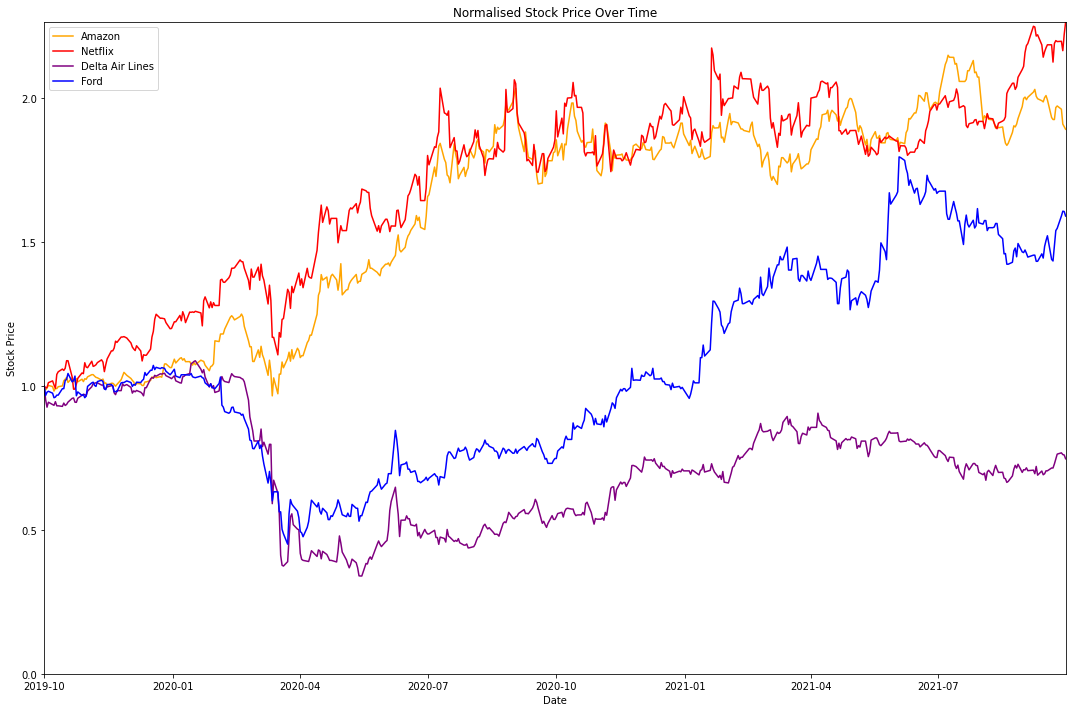

In [452]:
comparing_plot()

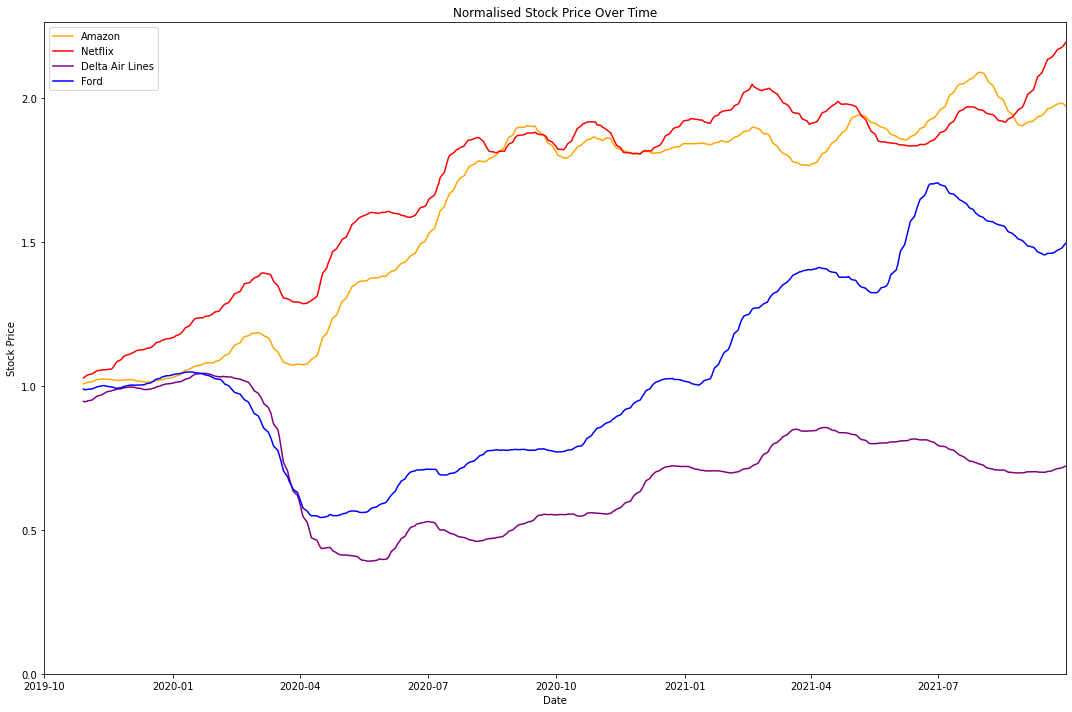

In [453]:
comparing_plot_month()

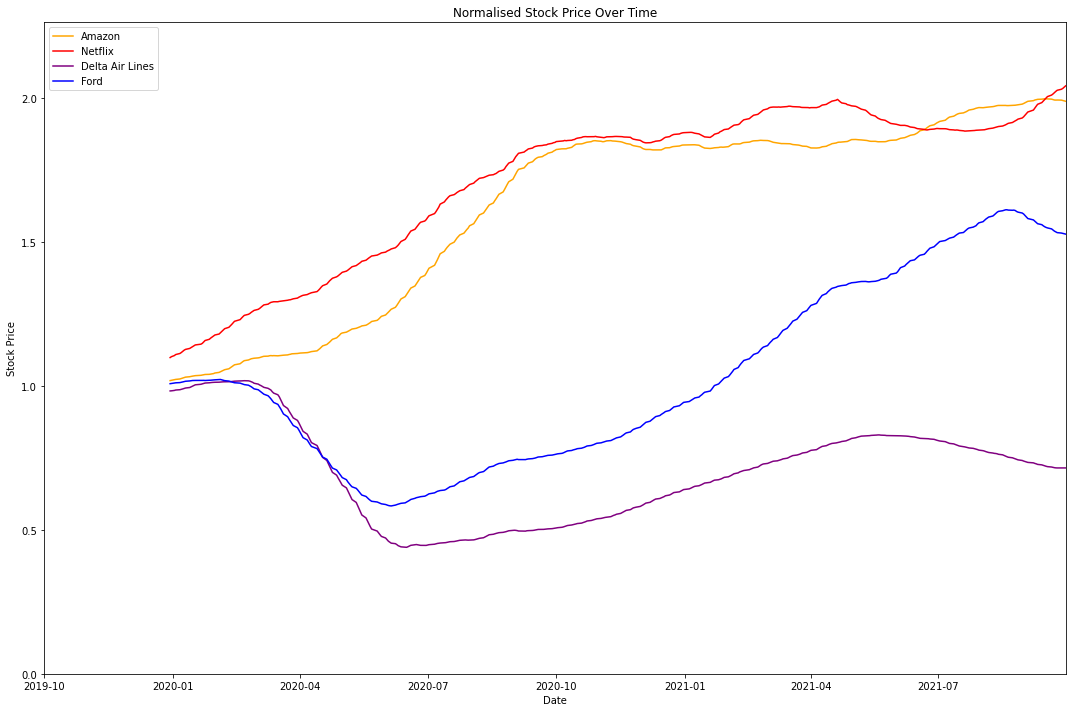

In [454]:
comparing_plot_quarter()

These graphs illustrate the correlations between the four companies very well. Amazon and Netflix trends are very closely matched for the entire period showing why they have their 0.96 correlation. This is in juxtaposition to Delta Air Lines which splits off from the two tech companies to the bottom and never really recovers from it, staying a long way under them. Ford shows similarities with all three of the other stocks. It shares a very similar dip at the beginning of the period with Delta. However Ford, unlike Delta recovers a lot of its stock price in the following year. It ends up recovering all of its loss in value and even becoming more valueable than pre-COVID, like Netflix and Amazon

## Loss/gain over whole period

Finally we will compare the total value loss/gain in a bar chart

In [455]:
df_perc = pd.Series(percent_change)

In [456]:
df_perc

Amazon              89.268573
Netflix            126.404057
Delta Air Lines    -25.258722
Ford                59.101124
dtype: float64

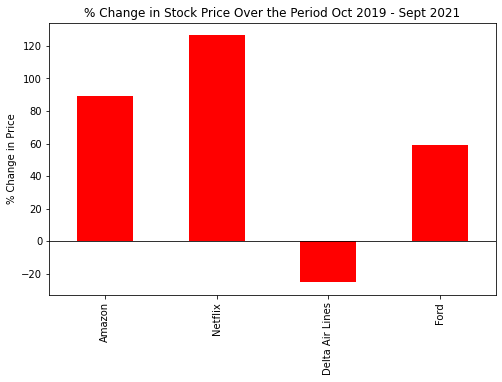

In [457]:
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

ax = df_perc.plot.bar(figsize=(8,5), color="red")

width = 0.3

ax.set_ylabel('% Change in Price')
ax.set_title("% Change in Stock Price Over the Period Oct 2019 - Sept 2021")

# x axis line
ax.axhline(0, color='black', linewidth=0.8)

plt.show()

This chart shows again the growth experienced by the three companies in comparison to Delta's loss. It shows that Ford in terms of growth over the whole period is a lot closer to Amazon and Netflix then it is to Delta. However it's initial drop still gave it a closer correlation to Delta than it has to the other two

# Conclusion

In this assignment we studied the stock trends of four different companies from the period of October 2019 to September 2021. From this data we found that the tech companies were not hit very hard, and even benefitted from the pandemic. Meanwhile the uncertainty of the situation and the shut down of air travel left Ford and Delta with a massive loss in value in the first half of 2020.

We found that unsurprisingly, Amazon and Netflix were very closely correlated throughout the entire period, being two companies in similar markets, while Ford and Delta varied quite a bit from the rest of the companies.

If I had to do some further analysis I would like to get some other stats for each business like their profit or revenue and see if there is any correlation between them. I also think there are a few other interesting stocks which this research could be extended to.